<a href="https://colab.research.google.com/github/amrtariq/NTI_AI_Projects/blob/main/Classify_Concrete_Samples_using_AlexNet_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Classify Concrete Samples using AlexNet CNN

##Data Loading and Preparation

In [1]:
!wget https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/concrete_data_week4.zip
!unzip concrete_data_week4.zip

import keras 
from keras.models import * 
from keras.layers import * 
from keras.preprocessing import image
import PIL

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_set = train_datagen.flow_from_directory(directory='/content/concrete_data_week4/train/', target_size=(224, 224),
        batch_size=128,shuffle=False,seed=42)

valid_set = valid_datagen.flow_from_directory('/content/concrete_data_week4/valid/', target_size=(224, 224),
        batch_size=128,shuffle=False,seed=42)
test_set = test_datagen.flow_from_directory('/content/concrete_data_week4/test/', target_size=(224, 224),
        batch_size=128,shuffle=False,seed=42)


Streaming output truncated to the last 5000 lines.
  inflating: concrete_data_week4/train/negative/08821.jpg  
  inflating: __MACOSX/concrete_data_week4/train/negative/._08821.jpg  
  inflating: concrete_data_week4/train/negative/03974.jpg  
  inflating: __MACOSX/concrete_data_week4/train/negative/._03974.jpg  
  inflating: concrete_data_week4/train/negative/12879.jpg  
  inflating: __MACOSX/concrete_data_week4/train/negative/._12879.jpg  
  inflating: concrete_data_week4/train/negative/09281.jpg  
  inflating: __MACOSX/concrete_data_week4/train/negative/._09281.jpg  
  inflating: concrete_data_week4/train/negative/10908.jpg  
  inflating: __MACOSX/concrete_data_week4/train/negative/._10908.jpg  
  inflating: concrete_data_week4/train/negative/01805.jpg  
  inflating: __MACOSX/concrete_data_week4/train/negative/._01805.jpg  
  inflating: concrete_data_week4/train/negative/04955.jpg  
  inflating: __MACOSX/concrete_data_week4/train/negative/._04955.jpg  
  inflating: concrete_data_week4

In [34]:
print("No. of Batches of 128:" + str(len(train_set)))
print("First Batch:(image, state)" + str(len(train_set[0])))
print("Images in Batch:" + str(train_set[0][0].shape))
print("First Image in Batch 0:" + str(train_set[0][0][0].shape))

No. of Batches of 128:235
First Batch:(image, state)2
Images in Batch:(128, 224, 224, 3)
First Image in Batch 0:(224, 224, 3)


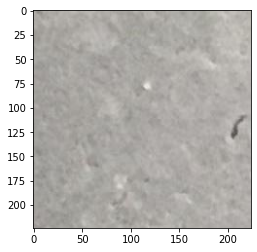

In [21]:
from matplotlib import pyplot as plt
plt.imshow(train_set[0][0][0])

In [ ]:
train_set.class_indices

{'negative': 0, 'positive': 1}

In [ ]:
valid_set.class_indices

{'negative': 0, 'positive': 1}

In [ ]:
test_set.class_indices

{'negative': 0, 'positive': 1}

##Model Fitting

In [ ]:
model=keras.Sequential()
model.add(Conv2D(96, kernel_size=(11, 11), strides=(4,4), padding="same", activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(3, 3),strides=(2,2))) 
model.add(Conv2D(256, (5, 5),strides=(1,1),padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3),strides=(2,2)))
model.add(Conv2D(384, (3, 3),strides=(1,1), padding="same", activation='relu'))
model.add(Conv2D(384, (3, 3),strides=(1,1), padding="same", activation='relu'))
model.add(Conv2D(384, (3, 3),strides=(1,1), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3),strides=(2,2),padding="same")) 
model.add(Flatten()) 
model.add(Dense(4096, activation='relu')) 
model.add(Dense(4096, activation='relu')) 
model.add(Dense(2, activation='softmax'))

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer="sgd", metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 56, 56, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 384)       885120    
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 384)       1

In [ ]:
results=model.fit( train_set, epochs=5,validation_data=test_set,steps_per_epoch=235,validation_steps=4,batch_size=128 )

Epoch 1/5
235/235 [==============================] - 92s 341ms/step - loss: 0.6848 - accuracy: 0.6032 - val_loss: 0.6231 - val_accuracy: 0.8760
Epoch 2/5
235/235 [==============================] - 84s 356ms/step - loss: 0.5329 - accuracy: 0.7970 - val_loss: 0.4015 - val_accuracy: 0.8100
Epoch 3/5
235/235 [==============================] - 80s 342ms/step - loss: 0.2396 - accuracy: 0.9090 - val_loss: 0.0877 - val_accuracy: 0.9700
Epoch 4/5
235/235 [==============================] - 80s 338ms/step - loss: 0.1167 - accuracy: 0.9535 - val_loss: 0.0946 - val_accuracy: 0.9740
Epoch 5/5
235/235 [==============================] - 80s 339ms/step - loss: 0.1615 - accuracy: 0.9518 - val_loss: 0.0564 - val_accuracy: 0.9800


##Results

In [ ]:
model.evaluate(train_set)

235/235 [==============================] - 62s 265ms/step - loss: 0.0726 - accuracy: 0.9751


[0.07256251573562622, 0.9750674962997437]

In [ ]:
model.evaluate(test_set)

4/4 [==============================] - 1s 251ms/step - loss: 0.0564 - accuracy: 0.9800


[0.056416191160678864, 0.9800000190734863]

In [ ]:
y_pred=model.predict(test_set)

In [ ]:
import numpy as np
y_pred=np.argmax(y_pred,axis=1)
#y_pred= ((model.predict(test_set)>=0.5).astype(int))

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(test_set.labels,y_pred))
print(accuracy_score(test_set.labels,y_pred)*100)


[[250   0]
 [ 10 240]]
98.0


Text(0.5, 0, 'epoch')

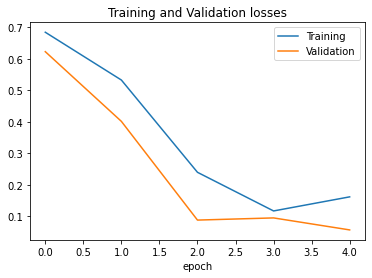

In [ ]:
import matplotlib.pyplot as plt

plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation losses')
plt.xlabel('epoch')
#plt.ylim([0,1])

Text(0.5, 0, 'epoch')

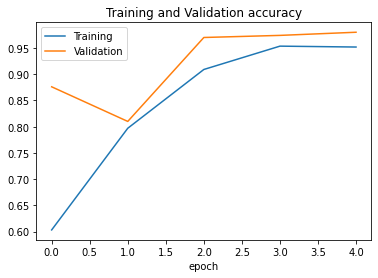

In [ ]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation accuracy')
plt.xlabel('epoch')
#plt.ylim([0,1])